In [1]:
cd ..

/home/cody/inner-knowledge-pruning


In [2]:
from fastai.vision.all import *
from fastai.distributed import *
import torch
import torch.nn as nn
import torchvision
from torchvision import models
import torchvision.transforms as transforms

from src.dataloader import make_data_loader

In [3]:
dataloaders, _ = make_data_loader(32, 'imagewoof')

In [4]:
dataloaders

{'train': <torch.utils.data.dataloader.DataLoader at 0x7fcea04cca60>,
 'val': <torch.utils.data.dataloader.DataLoader at 0x7fcea04cc820>}

In [5]:


dls = DataLoaders(dataloaders['train'], dataloaders['val'])

In [6]:
model = models.resnet34(pretrained=False)

In [7]:
model.fc = nn.Linear(in_features=512, out_features=10)
model = model.cuda()

In [8]:
learn = Learner(dls, model, loss_func=LabelSmoothingCrossEntropy(), metrics=accuracy, wd=1e-3, cbs=[CudaCallback, SaveModelCallback()], path=Path.cwd()/'tmp_cifar10')
learn.model = learn.model.cuda()

SuggestedLRs(lr_min=4.786300996784121e-05, lr_steep=6.309573450380412e-07)

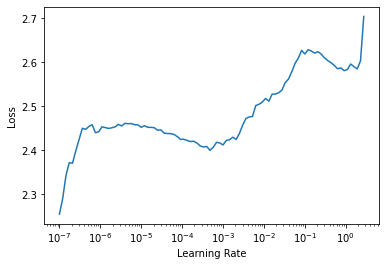

In [9]:
learn.lr_find()

In [10]:
learn.fit_one_cycle(240, 5e-3, wd=1e-2)

epoch,train_loss,valid_loss,accuracy,time
0,2.127579,2.127957,0.244846,00:22
1,2.023368,1.955478,0.327055,00:22
2,1.885531,1.910109,0.361924,00:22
3,1.867253,1.734492,0.452023,00:23
4,1.824442,1.707793,0.447188,00:23
5,1.792288,1.664753,0.477984,00:23
6,1.775789,1.762460,0.434207,00:23
7,1.748893,1.809605,0.446424,00:23
8,1.712128,1.678337,0.485620,00:23
9,1.673341,1.769250,0.474166,00:23


Better model found at epoch 0 with valid_loss value: 2.127957344055176.
Better model found at epoch 1 with valid_loss value: 1.9554784297943115.
Better model found at epoch 2 with valid_loss value: 1.9101094007492065.
Better model found at epoch 3 with valid_loss value: 1.7344924211502075.
Better model found at epoch 4 with valid_loss value: 1.7077932357788086.
Better model found at epoch 5 with valid_loss value: 1.664752721786499.
Better model found at epoch 12 with valid_loss value: 1.562783122062683.
Better model found at epoch 14 with valid_loss value: 1.5616140365600586.
Better model found at epoch 15 with valid_loss value: 1.4813288450241089.
Better model found at epoch 19 with valid_loss value: 1.3876910209655762.
Better model found at epoch 21 with valid_loss value: 1.371587872505188.
Better model found at epoch 23 with valid_loss value: 1.3469972610473633.
Better model found at epoch 26 with valid_loss value: 1.3068745136260986.
Better model found at epoch 27 with valid_loss v

In [11]:
with open('./pruning_stats/image_woof_struct.pickle', 'rb') as f:
    dfs = pickle.load(f)

In [12]:
learn.validate()

Better model found at epoch 0 with valid_loss value: 0.8905574083328247.


(#2) [0.7904736399650574,0.8905574083328247]


learn.fit_one_cycle(120, 4e-4, wd=1e-3) :[0.8348009586334229,0.8666327595710754]

learn.fit_one_cycle(120, 1e-4, wd=1e-3) : [0.8964883089065552,0.8388903141021729]

learn.fit_one_cycle(120, 1e-3, wd=1e-3): [0.8198269009590149,0.872741162776947]

learn.fit_one_cycle(120, 1e-3, wd=1e-2): [0.8102850317955017,0.8785950541496277]

learn.fit_one_cycle(120, 5e-3, wd=1e-2): [0.7996357679367065,0.8857215642929077]

learn.fit_one_cycle(120, 1e-2, wd=1e-2):[0.8029242157936096,0.8816492557525635]
